<a href="https://colab.research.google.com/github/prabirdeb/Ted-Talk-Views-Prediction/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ted Talk Views Prediction**

**The performance of a machine learning model depends on three factors:**

i. Quality of Data 

(for training and testing)

ii. Quantity of Data 

(more the experiences better will be the learning)

iii. Quality of Model 

(proper model selection and hyperparameter tuning)



# **Exploration and Pre-processing of Data**

This involves following steps to transform raw data into a quality data for the ml model 

### **1. Connection with the Data**

Here, we are provided with a dataset of Ted Talk Views.

Thus, the dataset is actually a collection of experiences about different Ted Talk videos. 

Now, we need to **decode the set of experiences** to build a model for Ted Talk Videos Views Prediction.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [102]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
import ast
from datetime import datetime
from datetime import date
import re

from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error 

Using matplotlib backend: agg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading the data as pandas dataframe
ted_talk_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Ted Talk Views Prediction-Prabir Debnath/data_ted_talks.csv')

### **2. First Feelings of the Data**

Here, the columns are the set of features, showing the way to reach final decoded experience or conclusions.  

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [4]:
ted_talk_df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


### **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions and thus step by step, we find the most important features or the exact way to decode the experiences.

In [5]:
ted_talk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [6]:
ted_talk_df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [7]:
# Checking the unique values for each column
for column_name in ted_talk_df.columns:
  print(colored(f"Unique values for {column_name}:",'blue', attrs=['bold']))
  print(ted_talk_df[column_name].unique())

Unique values for talk_id:
[    1    92     7 ... 62263 62784 62794]
Unique values for title:
['Averting the climate crisis' "The best stats you've ever seen"
 'Simplicity sells' ... 'How "policing for profit" undermines your rights'
 'The electrifying speeches of Sojourner Truth'
 'The most important anus in the ocean']
Unique values for speaker_1:
['Al Gore' 'Hans Rosling' 'David Pogue' ... 'Dick M. Carpenter II'
 'Daina Ramey Berry' 'Cella Wright']
Unique values for all_speakers:
["{0: 'Al Gore'}" "{0: 'Hans Rosling'}" "{0: 'David Pogue'}" ...
 "{0: 'Dick M. Carpenter II'}" "{0: 'Daina Ramey Berry'}"
 "{0: 'Cella Wright'}"]
Unique values for occupations:
["{0: ['climate advocate']}"
 "{0: ['global health expert; data visionary']}"
 "{0: ['technology columnist']}" ...
 "{0: ['psychotherapist', 'psychosomatic psychiatrist']}"
 "{0: ['epidemiologist', 'philanthropist'], 1: ['head of ted']}"
 "{0: ['law researcher']}"]
Unique values for about_speakers:
["{0: 'Nobel Laureate Al Gore focu

In [8]:
# Checking the no. of unique values in each column
print(ted_talk_df.nunique())

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64


In [9]:
ted_talk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

### **4. Cleaning the Data**

In this step, we treat null, missing, "?" or duplicate values.

When there is any string containing a Python literal in any of the important feature, we also evaluate them.

We do encoding of categorical features to make it usuable in the model.

We also create new feature when found important during the analysis.

Thus, we get a clean experience set with important features. 

We check the statistics further on clean data.

In [10]:
# Finding out the relavant features from the deeper understanding of the data
relavant_features=['occupations', 'views', 'published_date',
                   'native_lang', 'comments', 'duration', 'topics','speaker_1']

In [11]:
# Creating new df with relavant features
ted_talk_df_clean=ted_talk_df[relavant_features]

In [12]:
# Checking is there any duplicate value
len(ted_talk_df_clean[ted_talk_df_clean.duplicated()]) 

0

In [13]:
# checking the no. of null values in each column
print(ted_talk_df_clean.isnull().sum())

occupations       522
views               0
published_date      0
native_lang         0
comments          655
duration            0
topics              0
speaker_1           0
dtype: int64


In [14]:
# Imputation of 'comments' with median may mislead the model
# Imputation of 'occupations' with mode may mislead the model
# Thus dropping the rows with null values
ted_talk_df_clean = ted_talk_df_clean.dropna(axis=0)

In [15]:
print(ted_talk_df_clean.isnull().sum())

occupations       0
views             0
published_date    0
native_lang       0
comments          0
duration          0
topics            0
speaker_1         0
dtype: int64


In [16]:
ted_talk_df_clean.shape

(3344, 8)

In [17]:
# numerical_features
ted_talk_df_clean.describe().columns

Index(['views', 'comments', 'duration'], dtype='object')

In [18]:
# categorical_features
ted_talk_df_clean.describe(include=['object','category']).columns

Index(['occupations', 'published_date', 'native_lang', 'topics', 'speaker_1'], dtype='object')

In [19]:
print(ted_talk_df_clean.occupations.values[0])
print(ted_talk_df_clean.published_date.values[0])
print(ted_talk_df_clean.native_lang.values[0])
print(ted_talk_df_clean.topics.values[0])

{0: ['climate advocate']}
2006-06-27
en
['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']


In [20]:
print(type(ted_talk_df_clean.occupations.values[0]))
print(type(ted_talk_df_clean.published_date.values[0]))
print(type(ted_talk_df_clean.native_lang.values[0]))
print(type(ted_talk_df_clean.topics.values[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [21]:
# There are python literals as string in the categorical columns which need to be treated
for col in ['occupations', 'topics']:
  ted_talk_df_clean[col]=[ast.literal_eval(i) for i in ted_talk_df_clean[col]]

In [22]:
print(type(ted_talk_df_clean.occupations.values[0]))
print(type(ted_talk_df_clean.published_date.values[0]))
print(type(ted_talk_df_clean.native_lang.values[0]))
print(type(ted_talk_df_clean.topics.values[0]))

<class 'dict'>
<class 'str'>
<class 'str'>
<class 'list'>


In [23]:
# extracting the list from the dict of occupations
ted_talk_df_clean['occupations']=[i.get(0) for i in ted_talk_df_clean['occupations']]

In [24]:
print(type(ted_talk_df_clean.occupations.values[0]))

<class 'list'>


In [25]:
# Datetime is appearing as string and we are converting to datetime
ted_talk_df_clean['published_date']=ted_talk_df_clean['published_date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))

In [26]:
# Feature engineering on published date to to extract years run
ted_talk_df_clean['published_year']=ted_talk_df_clean['published_date'].apply(lambda x : x.year)
ted_talk_df_clean['base_year']=2021
ted_talk_df_clean['years_run']=(ted_talk_df_clean['base_year']-ted_talk_df_clean['published_year'])

In [27]:
ted_talk_df_clean.drop(['published_date','base_year','published_year'], axis = 1, inplace=True)

In [28]:
ted_talk_df_clean.head(2)

,occupations,views,native_lang,comments,duration,topics,speaker_1,years_run
0,[climate advocate],3523392,en,272.0,977,"[alternative energy, cars, climate change, cul...",Al Gore,15
1,[global health expert; data visionary],14501685,en,628.0,1190,"[Africa, Asia, Google, demo, economics, global...",Hans Rosling,15


In [29]:
# Checking value counts in categorical features
for column_name in ted_talk_df_clean.describe(include=['object','category']).columns:
  print(colored(f"Value counts for {column_name}:", attrs=['bold']))
  print(ted_talk_df_clean[column_name].value_counts())

Value counts for occupations:
[writer]                             54
[journalist]                         44
[entrepreneur]                       43
[artist]                             41
[designer]                           37
                                     ..
[sci-fi author]                       1
[former prime minister of greece]     1
[graphic artist, director]            1
[dolphin researcher]                  1
[law researcher]                      1
Name: occupations, Length: 1929, dtype: int64
Value counts for native_lang:
en       3312
es         15
fr          7
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
ja          1
it          1
Name: native_lang, dtype: int64
Value counts for topics:
[charter for compassion, compassion, global issues, religion]                                                                                                                              2
[art, creativity]                       

In [30]:
# Apart from english(en), there are very few experiences (only 1-15) as compared to 'en' with count 3312. 
# So, we are removing the exceptions in 'native_lang' category and creating a conditional df only for 'en'
ted_talk_df_clean=ted_talk_df_clean.loc[(ted_talk_df_clean['native_lang']=='en')].reset_index()
ted_talk_df_clean.drop('index', axis = 1, inplace=True)


**Now english has become the main feature of our dataset. Thus our model will predict the ted talk views only for english language**

In [31]:
# Thus we are dropping the 'native_lang' column
ted_talk_df_clean.drop('native_lang', axis = 1, inplace=True)

In [32]:
ted_talk_df_clean.shape

(3312, 7)

In [33]:
ted_talk_df_clean.head(2)

,occupations,views,comments,duration,topics,speaker_1,years_run
0,[climate advocate],3523392,272.0,977,"[alternative energy, cars, climate change, cul...",Al Gore,15
1,[global health expert; data visionary],14501685,628.0,1190,"[Africa, Asia, Google, demo, economics, global...",Hans Rosling,15


In [34]:
# There are mixture of words in topics and occupations column.
# Lets find out the main topics
main_topics=[]
for k in range(len(ted_talk_df_clean.topics)):
  common_terms=list(set([i[:5] for i in ted_talk_df_clean.occupations[k]]).intersection(set([i[:5] for i in ted_talk_df_clean.topics[k]])))
  
  if len(common_terms)!=0:
    for i in range(len(common_terms)):
      pattern = re.compile("%s" % common_terms[i])
      topics=[x for x in ted_talk_df_clean.topics[k] if pattern.match(x)][0]
  else:
    topics='life experience' # Here we are presenting unknown topic as 'life experience'

  main_topics.append(topics)

In [35]:
print(main_topics)

['climate change', 'global issues', 'technology', 'activism', 'education', 'architecture', 'comedy', 'philosophy', 'life experience', 'life experience', 'life experience', 'architecture', 'life experience', 'life experience', 'life experience', 'violin', 'invention', 'industrial design', 'life experience', 'life experience', 'life experience', 'life experience', 'life experience', 'life experience', 'evolution', 'physics', 'life experience', 'economics', 'psychology', 'psychology', 'life experience', 'life experience', 'investment', 'life experience', 'life experience', 'life experience', 'aircraft', 'life experience', 'photography', 'life experience', 'activism', 'life experience', 'life experience', 'life experience', 'future', 'activism', 'performance', 'life experience', 'success', 'life experience', 'life experience', 'anthropology', 'photography', 'astronomy', 'life experience', 'innovation', 'life experience', 'life experience', 'invention', 'life experience', 'life experience',

In [36]:
len(list(set(main_topics)))

191

In [37]:
ted_talk_df_clean['main_topics']=main_topics

In [38]:
ted_talk_df_clean[(ted_talk_df_clean['main_topics']=='life experience')][:2]

,occupations,views,comments,duration,topics,speaker_1,years_run,main_topics
8,"[pastor, author]",3998282,930.0,1262,"[Christianity, God, culture, happiness, leader...",Rick Warren,15,life experience
9,[filmmaker],460994,59.0,1538,"[TED Prize, culture, entertainment, film, glob...",Jehane Noujaim,15,life experience


In [39]:
ted_talk_df_clean['main_topics'].value_counts()

life experience       1972
design                  61
education               58
neuroscience            51
activism                45
                      ... 
indigenous peoples       1
personality              1
women in business        1
machine learning         1
epidemiology             1
Name: main_topics, Length: 191, dtype: int64

In [40]:
ted_talk_df_clean.drop(['occupations','topics'], axis = 1, inplace=True)

In [41]:
ted_talk_df_clean.head(2)

,views,comments,duration,speaker_1,years_run,main_topics
0,3523392,272.0,977,Al Gore,15,climate change
1,14501685,628.0,1190,Hans Rosling,15,global issues


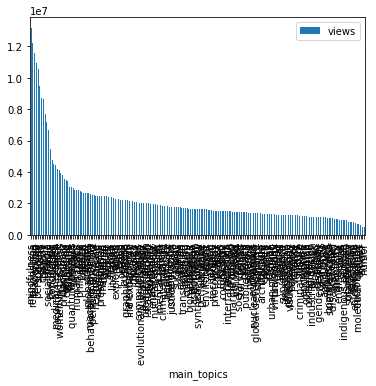

In [42]:
topics_df=pd.DataFrame(ted_talk_df_clean.groupby('main_topics')['views'].mean().sort_values(ascending=False))
topics_df.plot.bar()

In [43]:
# In the above barplot, we can find a strong relation of topics with average views
# Converting categorical 'main_topics' column to numerical individual topic columns
ted_talk_df_clean = ted_talk_df_clean.join(pd.get_dummies(ted_talk_df_clean['main_topics'],drop_first=True))

In [44]:
ted_talk_df_clean.drop(['main_topics'], axis = 1, inplace=True)

In [45]:
ted_talk_df_clean.head(2)

,views,comments,duration,speaker_1,years_run,adventure,advertising,agriculture,aircraft,animals,animation,anthropology,architecture,asteroid,astrobiology,astronomy,behavioral economics,biodiversity,bioethics,biology,biomechanics,bionics,biotech,blockchain,brain,business,cancer,chemistry,children,climate change,cognitive science,collaboration,comedy,communication,community,complexity,composing,computers,conducting,conservation,...,religion,robots,sanitation,science,science fiction,security,simplicity,singer,skateboarding,sleep,social change,social media,sociology,software,solar energy,sound,space,speech,sports,statistics,storytelling,success,surveillance,sustainability,synthetic biology,teaching,technology,theater,transportation,trust,urban,urban planning,violence,violin,virtual reality,virus,visualizations,water,women,women in business
0,3523392,272.0,977,Al Gore,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14501685,628.0,1190,Hans Rosling,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


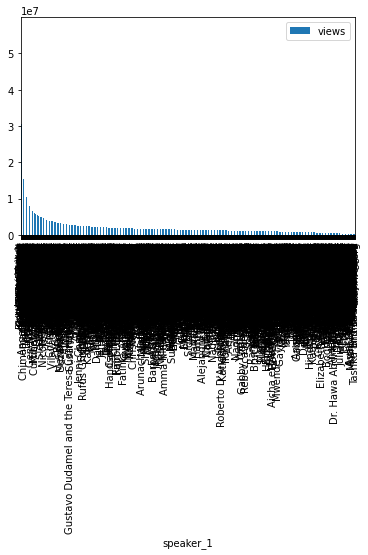

In [46]:
speaker_df=pd.DataFrame(ted_talk_df_clean.groupby('speaker_1')['views'].mean().sort_values(ascending=False))
speaker_df.plot.bar()

In [47]:
# In the above bar plot, we can find there is a strong relationship of speaker with views.
# Thus we can divide speakers into three categories: Highly Famous:2, Medium Famous:1, Least Famous:0
speaker_df.rename(columns={'views':'views_mean'},inplace=True)
ted_talk_df_clean = ted_talk_df_clean.merge(speaker_df,on = 'speaker_1',how = 'left')
ted_talk_df_clean['speaker_cat'] = ted_talk_df_clean['views_mean'].apply(lambda x : 0 if x < 0.4*10**7 else (1 if 0.4*10**7 <= x < 0.8*10**7 else 2))


In [48]:
ted_talk_df_clean["speaker_cat"].value_counts()

0    2997
1     212
2     103
Name: speaker_cat, dtype: int64

In [49]:
ted_talk_df_clean.drop(['speaker_1','views_mean'],axis=1,inplace=True)

In [50]:
ted_talk_df_clean.head(2)

,views,comments,duration,years_run,adventure,advertising,agriculture,aircraft,animals,animation,anthropology,architecture,asteroid,astrobiology,astronomy,behavioral economics,biodiversity,bioethics,biology,biomechanics,bionics,biotech,blockchain,brain,business,cancer,chemistry,children,climate change,cognitive science,collaboration,comedy,communication,community,complexity,composing,computers,conducting,conservation,coral reefs,...,robots,sanitation,science,science fiction,security,simplicity,singer,skateboarding,sleep,social change,social media,sociology,software,solar energy,sound,space,speech,sports,statistics,storytelling,success,surveillance,sustainability,synthetic biology,teaching,technology,theater,transportation,trust,urban,urban planning,violence,violin,virtual reality,virus,visualizations,water,women,women in business,speaker_cat
0,3523392,272.0,977,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14501685,628.0,1190,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **5. Treating Anomalies in the Data**

While, we are finding out the **general formula** from the experiences, we should identify the outlier or **exceptional observations** for all the important features and keep them aside during the analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

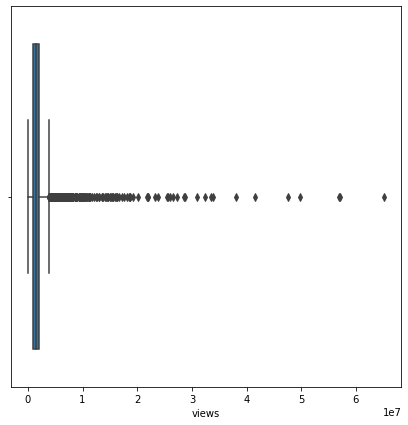

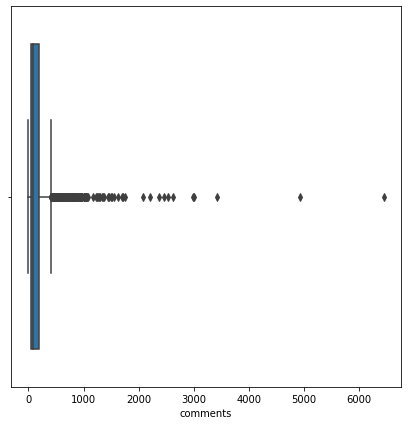

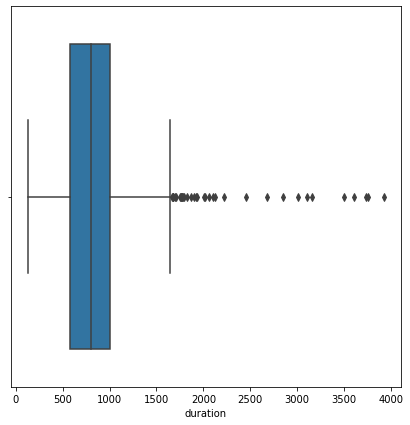

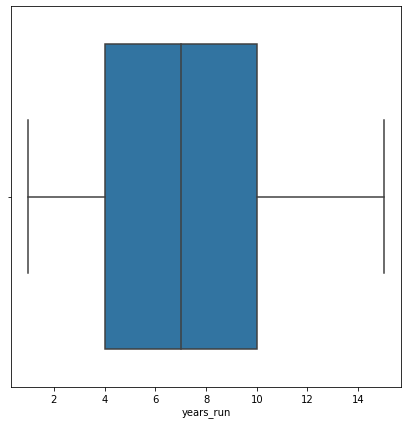

In [51]:
# Checking outliers in the features
for col in ted_talk_df_clean.describe().columns[:4]:
  fig = plt.figure(figsize=(7, 7))
  sns.boxplot(ted_talk_df_clean[col])
plt.show()

In [52]:
len(ted_talk_df_clean[ted_talk_df_clean['views'] > 1.4*10**7])

46

In [53]:
# There are only few experiences with more than 1.4*10^7 views. Thus we can remove these experiences
ted_talk_df_clean=ted_talk_df_clean[ted_talk_df_clean['views'] < 1.4*10**7]

In [54]:
len(ted_talk_df_clean[ted_talk_df_clean['comments'] > 2900])

3

In [55]:
# There are only few experiences with more than 2900 comments. Thus we can remove these experiences
ted_talk_df_clean=ted_talk_df_clean[ted_talk_df_clean['comments'] < 2900]

In [58]:
ted_talk_df_clean.shape

(3263, 195)

### **6. Final Feature Selection from the Data**

Now we need to understand the distribution of the features and the relationship among the features for the decision of transformation, scaling and final selection of features.

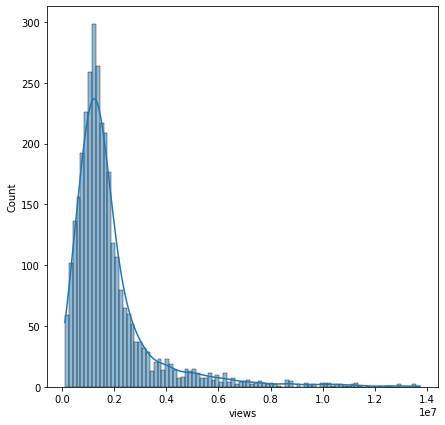

In [59]:
# Checking the distribution of dependent variable
plt.figure(figsize=(7,7))
sns.histplot(ted_talk_df_clean['views'], kde=True)
plt.show()

In [60]:
# Views is extreamly positively scewed, so need log transformation

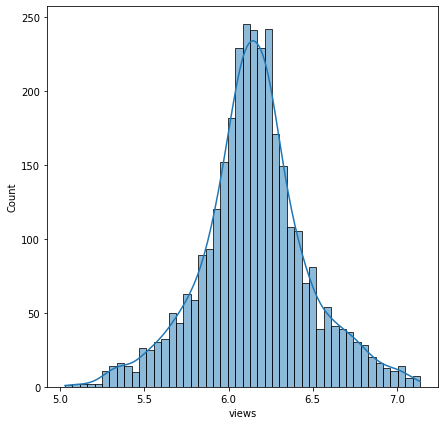

In [61]:
# Checking log transformation
plt.figure(figsize=(7,7))
sns.histplot(np.log10(ted_talk_df_clean['views']), kde=True)
plt.show()

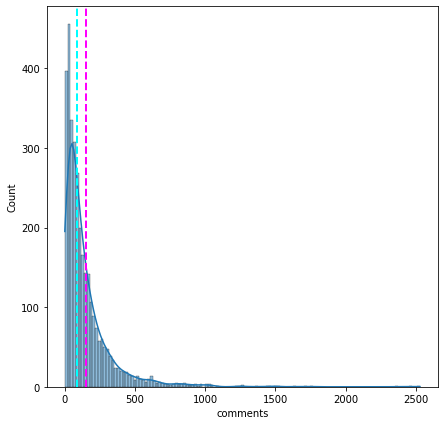

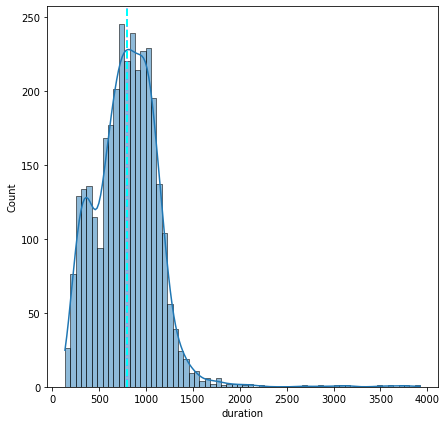

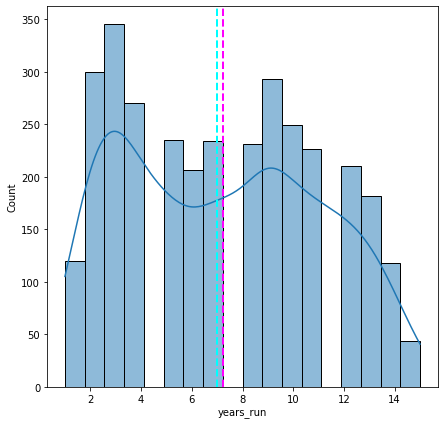

In [62]:
# Checking distribution of all numerical independent variables (except views and topics)
for col in ted_talk_df_clean.describe().columns[1:4]:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.gca()
    feature = ted_talk_df_clean[col]
    sns.histplot(feature, kde=True)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
plt.show()

In [63]:
# We can see the 'comments' and 'duration' are also positively skewed. Thus need log transformation
# days old is not positively or negatively sckewed.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


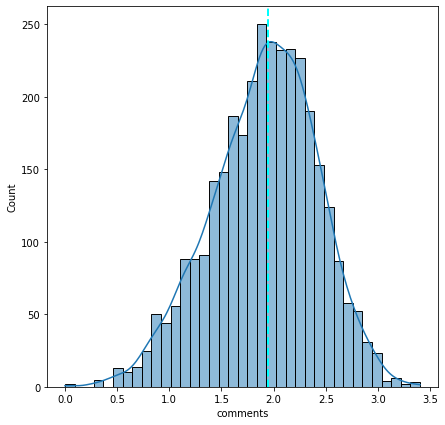

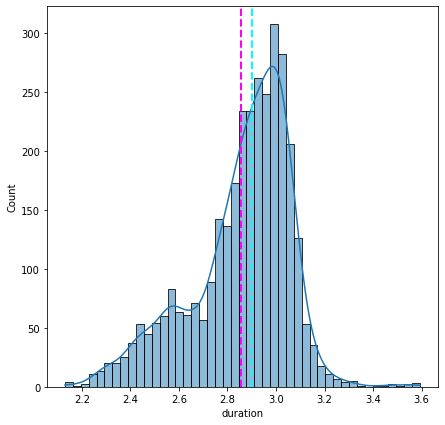

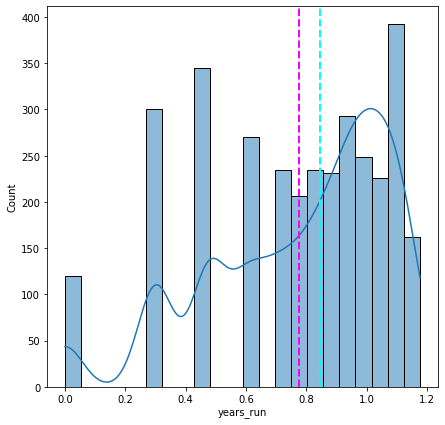

In [64]:
# Checking distribution after log transformation
for col in ted_talk_df_clean.describe().columns[1:4]:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.gca()
    feature = np.log10(ted_talk_df_clean[col])
    sns.histplot(feature, kde=True)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
plt.show()

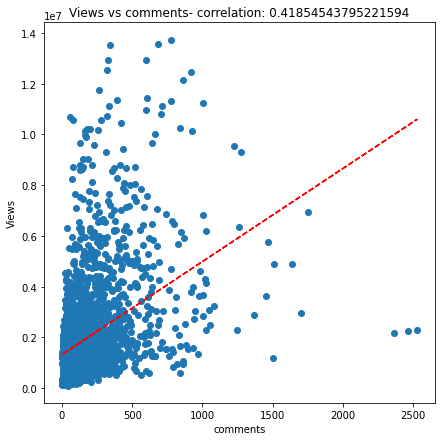

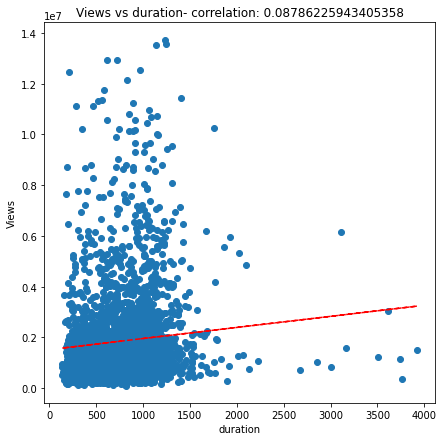

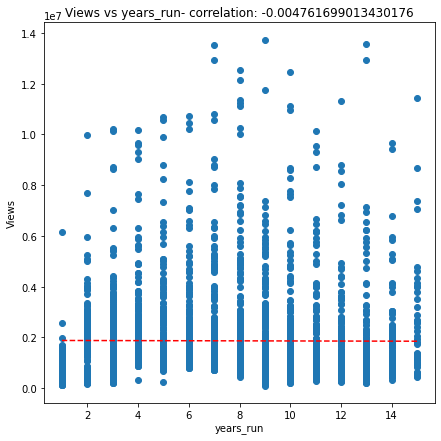

In [65]:
# Checking correlation of dependent variable with independent variables
for col in ted_talk_df_clean.describe().columns[1:4]:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.gca()
    feature = ted_talk_df_clean[col]
    label = ted_talk_df_clean['views']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Views')
    ax.set_title('Views vs ' + col + '- correlation: ' + str(correlation))
    fit = np.polyfit(feature, label, deg=1) 
    p = np.poly1d(fit) 
    plt.plot(feature,p(feature),"r--") 
plt.show()

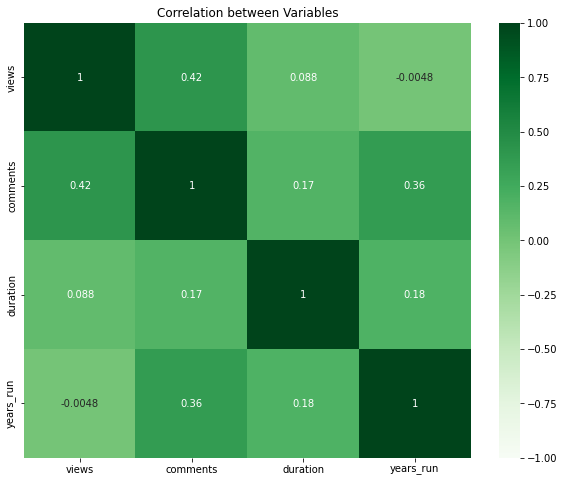

In [66]:
# Checking multicolinearity
plt.figure(figsize=(10,8))
sns.heatmap(ted_talk_df_clean.iloc[:,:4].corr(), vmin=-1, cmap='Greens', annot=True)
plt.title('Correlation between Variables')
plt.show()

In [67]:
# Creating function for checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [68]:
calc_vif(ted_talk_df_clean[[i for i in ted_talk_df_clean.describe().columns if i not in ['views']]])

,variables,VIF
0,comments,2.215831
1,duration,6.858496
2,years_run,5.777993
3,adventure,1.005836
4,advertising,1.010795
...,...,...
189,visualizations,1.003223
190,water,1.004824
191,women,1.028606
192,women in business,1.002137


In [69]:
# All the VIF are below 10
# Thus there is no problem of multicolinearity and no need to remove any feature

### **7. Preparation of Input and Output Data**

In [70]:
# Creating dependent(output) and independent(input) variable
dependent_variable='views'
independent_variables=list(set(ted_talk_df_clean.describe().columns)-{dependent_variable})
print(independent_variables)

['biomechanics', 'environment', 'urban planning', 'media', 'money', 'urban', 'engineering', 'guitar', 'mindfulness', 'neuroscience', 'refugees', 'culture', 'advertising', 'fashion', 'technology', 'asteroid', 'coral reefs', 'music', 'sanitation', 'anthropology', 'communication', 'architecture', 'personality', 'science fiction', 'synthetic biology', 'women in business', 'policy', 'evolution', 'finance', 'future', 'violin', 'disability', 'biotech', 'evolutionary psychology', 'military', 'garden', 'homelessness', 'biodiversity', 'business', 'medical research', 'industrial design', 'gaming', 'drones', 'painting', 'sound', 'forensics', 'presentation', 'complexity', 'performance', 'innovation', 'biology', 'blockchain', 'nuclear weapons', 'diversity', 'humor', 'machine learning', 'singer', 'medicine', 'conducting', 'energy', 'years_run', 'animation', 'leadership', 'mental health', 'religion', 'surveillance', 'invention', 'education', 'investment', 'morality', 'trust', 'privacy', 'success', 'da

In [71]:
# Creating normalized input and output dataset
X = np.log10(ted_talk_df_clean[['duration', 'comments']])
X[list(set(independent_variables)-{'duration', 'comments'})]=ted_talk_df_clean[list(set(independent_variables)-{'duration', 'comments'})]

y = np.log10(ted_talk_df_clean[dependent_variable])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [72]:
# Checking is there any infinite values after normalization
X.describe()

,duration,comments,biomechanics,environment,urban planning,media,urban,money,engineering,guitar,mindfulness,neuroscience,refugees,culture,advertising,fashion,technology,coral reefs,asteroid,music,sanitation,anthropology,communication,architecture,personality,science fiction,synthetic biology,women in business,policy,evolution,finance,future,violin,disability,biotech,evolutionary psychology,military,garden,homelessness,biodiversity,...,quantum physics,green,chemistry,human rights,criminal justice,microfinance,museums,nuclear energy,creativity,death,sociology,encryption,happiness,virus,theater,paleontology,behavioral economics,astrobiology,humanity,social change,immigration,public health,sustainability,water,plastic,adventure,marketing,health care,library,composing,interface design,oceans,primates,visualizations,aircraft,marine biology,design,peace,gender equality,conservation
count,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,...,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000
mean,2.857089,-inf,0.000306,0.003678,0.002145,0.001839,0.000306,0.000306,0.001532,0.001532,0.000306,0.015323,0.000919,0.001532,0.000919,0.002145,0.010113,0.000613,0.000306,0.008888,0.000306,0.001532,0.001226,0.013178,0.000306,0.000306,0.000306,0.000306,0.000919,0.001839,0.000919,0.004597,0.000919,0.000306,0.001226,0.000306,0.000613,0.000613,0.000306,0.000306,...,0.000919,0.000919,0.001839,0.000306,0.000613,0.000306,0.000613,0.001226,0.000919,0.000613,0.000306,0.000306,0.001226,0.000306,0.000919,0.003065,0.002145,0.000613,0.003065,0.009500,0.000919,0.001839,0.001839,0.001226,0.000613,0.000306,0.001532,0.000919,0.000613,0.000613,0.000613,0.004903,0.000919,0.000613,0.000306,0.003065,0.018694,0.002145,0.000306,0.000919
std,0.204628,NaN,0.017506,0.060541,0.046274,0.042848,0.017506,0.017506,0.039121,0.039121,0.017506,0.122854,0.030312,0.039121,0.030312,0.046274,0.100071,0.024754,0.017506,0.093868,0.017506,0.039121,0.034996,0.114054,0.017506,0.017506,0.017506,0.017506,0.030312,0.042848,0.030312,0.067656,0.030312,0.017506,0.034996,0.017506,0.024754,0.024754,0.017506,0.017506,...,0.030312,0.030312,0.042848,0.017506,0.024754,0.017506,0.024754,0.034996,0.030312,0.024754,0.017506,0.017506,0.034996,0.017506,0.030312,0.055283,0.046274,0.024754,0.055283,0.097021,0.030312,0.042848,0.042848,0.034996,0.024754,0.017506,0.039121,0.030312,0.024754,0.024754,0.024754,0.069864,0.030312,0.024754,0.017506,0.055283,0.135464,0.046274,0.017506,0.030312
min,2.130334,-inf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [73]:
y.describe()

count    3263.000000
mean        6.152593
std         0.315849
min         5.027533
25%         5.983839
50%         6.147713
75%         6.315401
max         7.138023
Name: views, dtype: float64

In [74]:
# Imputation of infinite values with zero
for col in X.columns:
  X[col].replace([np.inf, -np.inf], 0, inplace=True)

y.replace([np.inf, -np.inf], 0, inplace=True)

In [75]:
X.describe()

,duration,comments,biomechanics,environment,urban planning,media,urban,money,engineering,guitar,mindfulness,neuroscience,refugees,culture,advertising,fashion,technology,coral reefs,asteroid,music,sanitation,anthropology,communication,architecture,personality,science fiction,synthetic biology,women in business,policy,evolution,finance,future,violin,disability,biotech,evolutionary psychology,military,garden,homelessness,biodiversity,...,quantum physics,green,chemistry,human rights,criminal justice,microfinance,museums,nuclear energy,creativity,death,sociology,encryption,happiness,virus,theater,paleontology,behavioral economics,astrobiology,humanity,social change,immigration,public health,sustainability,water,plastic,adventure,marketing,health care,library,composing,interface design,oceans,primates,visualizations,aircraft,marine biology,design,peace,gender equality,conservation
count,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,...,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000
mean,2.857089,1.908118,0.000306,0.003678,0.002145,0.001839,0.000306,0.000306,0.001532,0.001532,0.000306,0.015323,0.000919,0.001532,0.000919,0.002145,0.010113,0.000613,0.000306,0.008888,0.000306,0.001532,0.001226,0.013178,0.000306,0.000306,0.000306,0.000306,0.000919,0.001839,0.000919,0.004597,0.000919,0.000306,0.001226,0.000306,0.000613,0.000613,0.000306,0.000306,...,0.000919,0.000919,0.001839,0.000306,0.000613,0.000306,0.000613,0.001226,0.000919,0.000613,0.000306,0.000306,0.001226,0.000306,0.000919,0.003065,0.002145,0.000613,0.003065,0.009500,0.000919,0.001839,0.001839,0.001226,0.000613,0.000306,0.001532,0.000919,0.000613,0.000613,0.000613,0.004903,0.000919,0.000613,0.000306,0.003065,0.018694,0.002145,0.000306,0.000919
std,0.204628,0.507965,0.017506,0.060541,0.046274,0.042848,0.017506,0.017506,0.039121,0.039121,0.017506,0.122854,0.030312,0.039121,0.030312,0.046274,0.100071,0.024754,0.017506,0.093868,0.017506,0.039121,0.034996,0.114054,0.017506,0.017506,0.017506,0.017506,0.030312,0.042848,0.030312,0.067656,0.030312,0.017506,0.034996,0.017506,0.024754,0.024754,0.017506,0.017506,...,0.030312,0.030312,0.042848,0.017506,0.024754,0.017506,0.024754,0.034996,0.030312,0.024754,0.017506,0.017506,0.034996,0.017506,0.030312,0.055283,0.046274,0.024754,0.055283,0.097021,0.030312,0.042848,0.042848,0.034996,0.024754,0.017506,0.039121,0.030312,0.024754,0.024754,0.024754,0.069864,0.030312,0.024754,0.017506,0.055283,0.135464,0.046274,0.017506,0.030312
min,2.130334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [76]:
y.describe()

count    3263.000000
mean        6.152593
std         0.315849
min         5.027533
25%         5.983839
50%         6.147713
75%         6.315401
max         7.138023
Name: views, dtype: float64

In [77]:
# Splitting of the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
# Standardization of Input Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
X_train.shape

(2610, 194)

# **Building and Evaluation of Model-1**

In [80]:
# Model training and hyper parameter tunning
model_rf = RandomForestRegressor(random_state=0)
parameters = {'n_estimators':[int(x) for x in np.linspace(2,20,num=10)], 
              'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
              'max_features':['auto','sqrt'],
              'min_samples_split':[2,5,10,15,100],
              'min_samples_leaf':[1,2,5,10]}
model_rf_cv = RandomizedSearchCV(model_rf, param_distributions=parameters, scoring='r2', cv=3, random_state=0)
model_rf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [2, 4, 6, 8, 10, 12, 14,
                                                         16, 18, 20]},
                   random_state=0, scoring='r2')

In [81]:
model_rf_cv.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 18}

In [103]:
# Checking model performance for train set
y_train_preds = model_rf_cv.predict(X_train)
rmse=math.sqrt(mean_squared_error(10**y_train, 10**y_train_preds))
print("RMSE:",rmse)
r2=r2_score(10**y_train, 10**y_train_preds)
print("R2:",r2)
accuracy = (1 -mean_absolute_percentage_error(10**y_train, 10**y_train_preds))*100
print('Accuracy:', round(accuracy, 2), '%.')

RMSE: 882669.6156967581
R2: 0.7193576499345035
Accuracy: 64.97 %.


In [104]:
# Checking model performance for test set
y_test_preds = model_rf_cv.predict(X_test)
rmse=math.sqrt(mean_squared_error(10**y_test, 10**y_test_preds))
print("RMSE:",rmse)
r2=r2_score(10**y_test, 10**y_test_preds)
print("R2:",r2)
accuracy = (1 -mean_absolute_percentage_error(10**y_test, 10**y_test_preds))*100
print('Accuracy:', round(accuracy, 2), '%.')

RMSE: 946743.9517133308
R2: 0.7101558140859103
Accuracy: 57.75 %.


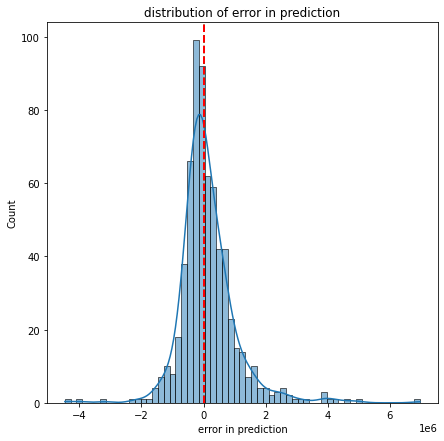

In [85]:
# Checking the distribution of error in prediction
plt.figure(figsize=(7, 7))
sns.histplot(10**y_test-10**y_test_preds, kde=True)
plt.axvline(0, color ='green', linestyle ="--", linewidth = 2)
plt.axvline((y_test-y_test_preds).mean(), color='red', linestyle='--', linewidth=2)
plt.title('distribution of error in prediction')
plt.xlabel('error in prediction')
plt.show()

In [86]:
# Mean error and zero error lines are matching and distribution of error is normal

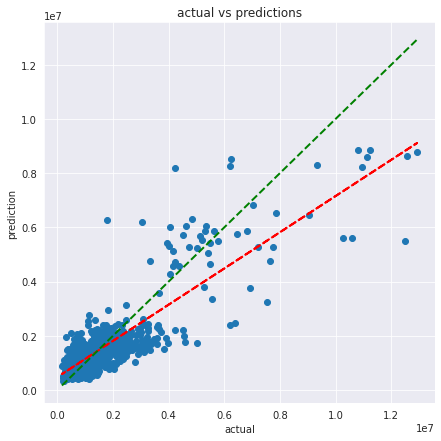

In [87]:
# Checking actual vs predictions
plt.figure(figsize=(7, 7))
sns.set_style("darkgrid")
plt.scatter(10**y_test, 10**y_test_preds)

fit = np.polyfit(10**y_test, 10**y_test_preds, deg=1) 
p = np.poly1d(fit) 
plt.plot(10**y_test,p(10**y_test),"r--",linewidth = 2) 
plt.plot([10**y_test.min(),10**y_test.mean(),10**y_test.max()], [10**y_test.min(),10**y_test.mean(),10**y_test.max()],"g--",linewidth = 2) 

plt.title('actual vs predictions')
plt.ylabel('prediction')
plt.xlabel('actual')
plt.show()

In [88]:
# Green line representing the ideal model and red line is representing actual model. 
# Here red line is near matching to green line and thus our model is a good one.

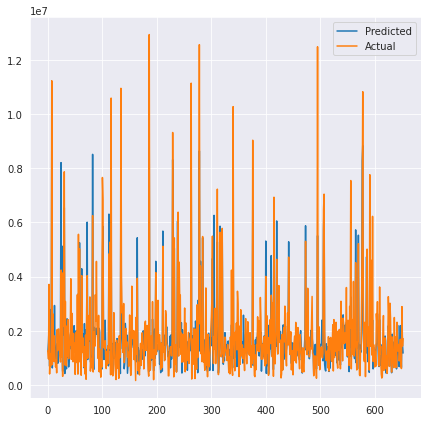

In [89]:
plt.figure(figsize=(7,7))
plt.plot(10**(y_test_preds))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [90]:
# Checking feature importances
from sklearn.ensemble import ExtraTreesRegressor
my_model=ExtraTreesRegressor()
my_model.fit(X_train,y_train)
print(list(zip(X.columns,my_model.feature_importances_)))

[('duration', 0.1399349439254187), ('comments', 0.2882173592410083), ('biomechanics', 0.00026540390815913827), ('environment', 0.0008204340111344461), ('urban planning', 0.0002786421626413622), ('media', 0.00016330344744515155), ('urban', 0.00014696917647739798), ('money', 1.8757303441352337e-05), ('engineering', 0.0008314386643926127), ('guitar', 0.0004501871648048334), ('mindfulness', 2.723605569547884e-05), ('neuroscience', 0.006149643880077974), ('refugees', 1.710303584179682e-05), ('culture', 0.0008737449853745463), ('advertising', 0.000787068107238998), ('fashion', 0.00032318683661030826), ('technology', 0.0036862262858450416), ('coral reefs', 7.489365597964466e-05), ('asteroid', 7.79451895566728e-06), ('music', 0.0038066204995881123), ('sanitation', 0.00017290031907186596), ('anthropology', 0.0005504283862907438), ('communication', 0.00033125094050525376), ('architecture', 0.003905822123473652), ('personality', 0.0), ('science fiction', 8.215145314002308e-06), ('synthetic biolog

# **Building  and Evaluation of Model-2**

# **Building  and Evaluation of Model-3**

# **Conclusion**